In [2]:
# ML Assignment2: 
# https://github.com/visualizedata/ml/blob/master/final_assignment_2/images_starter.ipynb
# Code from Aaron Hill

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from skimage import io, color, transform, feature, data
from skimage.feature import hog, daisy
from my_measures import BinaryClassificationPerformance  
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.03
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

In [4]:
# file paths
ci_path = '/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment2/data/cropped_images_18/'
l_file = '/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment2/data/plane_labels_2018.csv'

In [5]:
# in downscaling the image, what do you want the new dimensions to be?
# the original dimensions of cropped images: (60, 140), which if 8,400 pixels
dims = (15, 35) # 25% of the original size, 525 pixels

In [132]:
# Hog
# def image_manipulation(imname, imgs_path, imview=False):
#     warnings.filterwarnings('ignore')
#     imname = imgs_path + imname + '.png'
#     img_raw = io.imread(imname)

#     fd, hog_image = hog(img_raw, orientations=8, pixels_per_cell=(12, 12),
#                     cells_per_block=(2, 2), visualize=True, multichannel=True)
#     final_image = np.array([hog_image])

#     if imview==True:
#         io.imshow(hog_image)
#     warnings.filterwarnings('always')
#     return final_image

# Daisy
def image_manipulation(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname, as_gray=True)
    
    gray = color.rgb2gray(img_raw) # remove color
#     descs, descs_img = daisy(gray, step=30, radius=18, rings=4, histograms=6,
#                          orientations=8, visualize=True)
    descs, descs_img = daisy(gray, step=30, radius=18, rings=4, histograms=6,
                         orientations=8, visualize=True)
    final_image = descs_img
    
    if imview==True:
        io.imshow(final_image)
    warnings.filterwarnings('always')
    return final_image


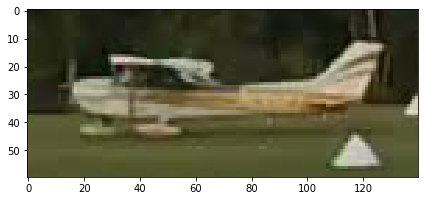

In [133]:
this_imname = ci_path + '2017-08-25T23+24+13_390Z.png'
io.imshow(io.imread(this_imname))

In [134]:
# function that takes raw images and completes all preprocessing required before model fits
def process_raw_data(labels_fn, images_fp, my_random_seed, imview=False, test=False):
    plane_data = pd.read_csv(labels_fn) # read in photograph labels
    print("First few lines of image labels: ")
    print(plane_data.head())
    print("Size of image label dataFrame: ")
    print(plane_data.shape)
        
    # construct lists for features, labels, and a crosswalk reference to image names
    features_list = []
    if (not test):
        y_list = []
    imnames_list = []

    for index, row in plane_data.iterrows():
        features_list.append(image_manipulation(row['img_name'], images_fp))
        if (not test):
            y_list.append(row['plane'])
        imnames_list.append(row['img_name'])
    
    # convert the lists to ndarrays
    features = np.asarray(features_list)
    if (not test):
        Y = np.asarray(y_list)
    imgs = np.asarray(imnames_list)
    print('Shape of original feature representation: ')
    print(features.shape)

    # flatten the images ndarray to one row per image
    features_flat = features.reshape((features.shape[0], -1))

    print('Shape of flat feature representation: ')
    print(features_flat.shape)

    if (not test):
        print('Shape of Y: ')
        print(Y.shape)

        print('Number of images with planes: ')
        print(Y.sum())
    
        # create train and test sets
        data_train, data_test, y_train, y_test, imgs_train, imgs_test = train_test_split(features_flat, 
            Y, imgs, test_size = 0.25, random_state = my_random_seed)

        print('Shape of training set: ')
        print(y_train.shape)
        print('Number of training images that contain an airplane: ')
        print(y_train.sum())

        print('Shape of test set: ')
        print(y_test.shape)
        print('Number of test images that contain an airplane: ')
        print(y_test.sum())
    
    if (test):
        X_submission_test = features_flat
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(X_submission_test, plane_data)
    else: 
        print("Shape of data_train and data_test:")
        print(data_train.shape)
        print(data_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of imgs_train and imgs_test:")
        print(imgs_train.shape)
        print(imgs_test.shape)
        print('SUCCESS!')
        return(data_train, data_test, y_train, y_test, imgs_train, imgs_test)

In [135]:
data_train, data_test, y_train, y_test, imgs_train, imgs_test = process_raw_data(l_file, ci_path, 
    my_random_seed=27, imview=False, test=False)

First few lines of image labels: 
                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
Size of image label dataFrame: 
(6758, 2)
Shape of original feature representation: 
(6758, 60, 140, 3)
Shape of flat feature representation: 
(6758, 25200)
Shape of Y: 
(6758,)
Number of images with planes: 
101
Shape of training set: 
(5068,)
Number of training images that contain an airplane: 
75
Shape of test set: 
(1690,)
Number of test images that contain an airplane: 
26
Shape of data_train and data_test:
(5068, 25200)
(1690, 25200)
Shape of y_train and y_test:
(5068,)
(1690,)
Shape of imgs_train and imgs_test:
(5068,)
(1690,)
SUCCESS!


In [136]:
## MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network

nnm = {}
nnm_performance = {}
nnm_performance_test = {}
nnm_img_indices_to_view = {}

hls = [
#     (100,),
#     (5,5,5),
#     (10,10,10),
    (20,20,20),
    (20,10,10),
    (20,5,5),
    (20,15,15),
#     (30,30,30,30,),
#     (50,50,50,50,)
#     (100, 100, 100),
#     (150, 150, 150),
#     (180, 180, 180),
]


for i in range(4):
    
    nnm[i] = neural_network.MLPClassifier(hidden_layer_sizes=hls[i], max_iter=1000)
    print(nnm[i])
    nnm[i].fit(data_train, y_train)
    
    nnm_performance[i] = BinaryClassificationPerformance(nnm[i].predict(data_train), y_train, str(i))
    nnm_performance[i].compute_measures()
    nnm_performance[i].performance_measures['set'] = 'train'
    print('TRAINING SET: ')
    print(nnm_performance[i].performance_measures)

    nnm_performance_test[i] = BinaryClassificationPerformance(nnm[i].predict(data_test), y_test, str(i))
    nnm_performance_test[i].compute_measures()
    nnm_performance_test[i].performance_measures['set'] = 'test'
    print('TEST SET: ')
    print(nnm_performance_test[i].performance_measures)
    
    print('* * * * *')
    
    nnm_performance_test[i].img_indices()
    nnm_img_indices_to_view[i] = nnm_performance_test[i].image_indices


MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
TRAINING SET: 
{'Pos': 75, 'Neg': 4993, 'TP': 75, 'TN': 4993, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': '0', 'set': 'train'}
TEST SET: 
{'Pos': 26, 'Neg': 1664, 'TP': 24, 'TN': 1664, 'FP': 0, 'FN': 2, 'Accuracy': 0.9988165680473373, 'Precision': 1.0, 'Recall': 0.9230769230769231, 'desc': '0', 'set': 'test'}
* * * * *
MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)
TRAINING SET: 
{'Pos': 75, 'Neg': 4993, 'TP': 74, 'TN': 4993, 'FP': 0, 'FN': 1, 'Accuracy': 0.999802683504341, 'Precision': 1.0, 'Recall': 0.9866666666666667, 'desc': '1', 'set': 'train'}
TEST SET: 
{'Pos': 26, 'Neg': 1664, 'TP': 21, 'TN': 1664, 'FP': 0, 'FN': 5, 'Accuracy': 0.9970414201183432, 'Precision': 1.0, 'Recall': 0.8076923076923077, 'desc': '1', 'set': 'test'}
* * * * *
MLPClassifier(hidden_layer_sizes=(20, 5, 5), max_iter=1000)
TRAINING SET: 
{'Pos': 75, 'Neg': 4993, 'TP': 12, 'TN': 4993, 'FP': 0, 'FN': 63, 

In [137]:
def performance_examples(typ, measures):
    iiv = ''
    if typ == 'FP':
        iiv = typ + '_indices'
    elif typ == 'TP':
        iiv = typ + '_indices'
    elif typ == 'FN':
        iiv = typ + '_indices'
    else:
        raise ValueError('input must be "TP", "FP", or "FN"')
    for img in measures[iiv]:
        warnings.filterwarnings('ignore')    
        plt.figure()
        lookat = ci_path + imgs_test[img] + '.png' # location of original image
        io.imshow(lookat) # show original image
        plt.figure()
        warnings.filterwarnings('always')

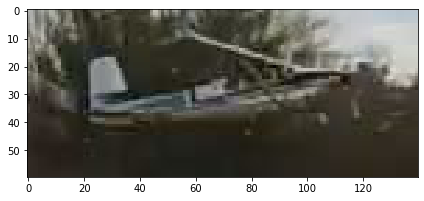

<Figure size 432x288 with 0 Axes>

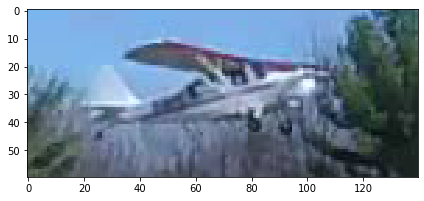

<Figure size 432x288 with 0 Axes>

In [130]:
performance_examples('FN', nnm_img_indices_to_view[0])

In [246]:
# # list of fits to compare: 
# final_fits = []

# for i in range(3): 
#     final_fits.append(nnm_performance[i].performance_measures)
#     final_fits.append(nnm_performance_test[i].performance_measures)

In [247]:
# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

# plt.figure(figsize=(10,10))

# for fit in final_fits:
#     if fit['set'] == 'train':
#         color = 'co'
#     else:
#         color = 'ro'
#     plt.plot(fit['FP'] / fit['Neg'], 
#              fit['TP'] / fit['Pos'], color, markersize=12)
#     plt.text(fit['FP'] / fit['Neg'], 
#              fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: Hog')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

In [138]:
submission_ci_path = '/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment2/data/test_cropped_images/' # file path for cropped images for training
submission_l_file = '/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment2/data/test_plane_labels.csv' # file path and file name for csv with labels

In [139]:
X_test_data, X_test_submission = process_raw_data(submission_l_file, submission_ci_path, my_random_seed=12, test=True)
print("Number of rows in the submission test set (should be 1,523): ")

First few lines of image labels: 
                   img_name
0  2016-08-02T13+50+24_430Z
1  2016-08-02T14+12+37_390Z
2  2016-08-03T12+32+21_790Z
3  2016-08-03T13+19+28_320Z
4  2016-08-05T15+24+58_670Z
Size of image label dataFrame: 
(1523, 1)
Shape of original feature representation: 
(1523, 60, 140, 3)
Shape of flat feature representation: 
(1523, 25200)
Shape of X_test for submission:
(1523, 25200)
SUCCESS!
Number of rows in the submission test set (should be 1,523): 


In [140]:
print(data_train.shape)
print(X_test_data.shape)

(5068, 25200)
(1523, 25200)


In [141]:
# concatenate predictions to the id
X_test_submission["prediction"] = nnm[0].predict(X_test_data)
# look at the proportion of positive predictions
print(X_test_submission['prediction'].mean())

0.013131976362442548


In [142]:
print(X_test_submission.shape) # should be (1523, 2)

(1523, 2)


In [143]:
# export submission file as pdf
# CHANGE FILE PATH: 
X_test_submission.to_csv('airplane_submission2.csv', index=False)